In [1]:
import numpy as np

import kcap_methods as km
import score_compression as sc
import deriv_stepsize_investigation as dsi

import matplotlib.pyplot as plt
import os

In [2]:
step_sizes = np.array([])
for value in [0.00001, 0.0001, 0.001, 0.01]:
    for i in range(9):
        step_sizes = np.append(step_sizes, value * (i+1))
step_sizes = np.append(step_sizes, 0.1)

print(step_sizes)

[1.e-05 2.e-05 3.e-05 4.e-05 5.e-05 6.e-05 7.e-05 8.e-05 9.e-05 1.e-04
 2.e-04 3.e-04 4.e-04 5.e-04 6.e-04 7.e-04 8.e-04 9.e-04 1.e-03 2.e-03
 3.e-03 4.e-03 5.e-03 6.e-03 7.e-03 8.e-03 9.e-03 1.e-02 2.e-02 3.e-02
 4.e-02 5.e-02 6.e-02 7.e-02 8.e-02 9.e-02 1.e-01]


In [3]:
print(len(step_sizes))

37


# Calculate the derivatives for varying stepsizes

dsi.run_varying_stepsize(step_sizes = step_sizes, mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")

In [4]:
# # Get omega_m deriv FOMs

omega_m_step_sizes, omega_m_fom = dsi.get_fom_vals(deriv_param = 'omega_m', step_sizes = step_sizes, mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")

# Get omch2 deriv FOMs

omch2_step_sizes, omch2_fom = dsi.get_fom_vals(deriv_param = 'omch2', step_sizes = step_sizes, mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")

# # Get ia deriv FOMs

# a_step_sizes, a_fom = dsi.get_fom_vals(deriv_param = 'a', step_sizes = step_sizes)

# Get sigma_8 deriv FOMs

sigma_8_step_sizes, sigma_8_fom = dsi.get_fom_vals(deriv_param = 'sigma_8', step_sizes = step_sizes, mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")


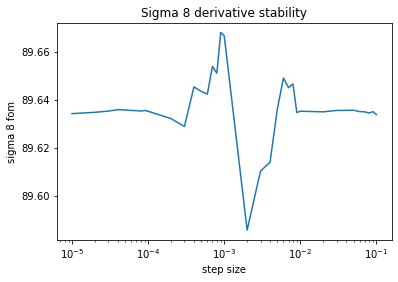

In [5]:
plt.plot(sigma_8_step_sizes, sigma_8_fom)
plt.xscale('log')
plt.xlabel('step size')
plt.ylabel('$\sigma_8$ fom')
plt.title('$\sigma_8$ derivative stability')
plt.show()

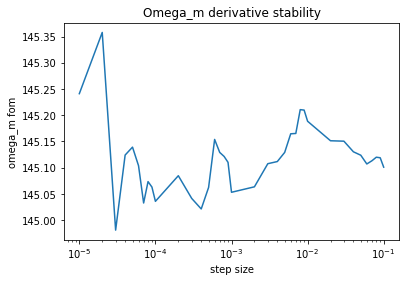

In [6]:
plt.plot(omega_m_step_sizes, omega_m_fom)
plt.xscale('log')
plt.xlabel('step size')
plt.ylabel('$\Omega_m$ fom')
plt.title('$\Omega_m$ derivative stability')
plt.show()

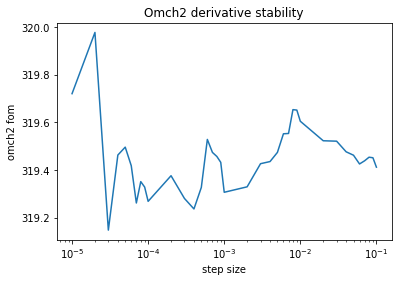

In [7]:
plt.plot(omch2_step_sizes, omch2_fom)
plt.xscale('log')
plt.xlabel('step size')
plt.ylabel('omch2 fom')
plt.title('Omch2 derivative stability')
plt.show()

Trial run 30 is the 0.01 stepsize run, so going to plot the actual derivative values that run. Should expect to see smooth IA/sigma_8, but non smooth omega_m

In [8]:
theta_dict = km.get_theta(mock_run = 30, vals_to_read = ['shear_xi_plus_binned', 'shear_xi_minus_binned'], mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")
omega_m_deriv_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned_omega_m_deriv', 'shear_xi_minus_binned_omega_m_deriv'], mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")
sigma_deriv_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned_sigma_8_deriv', 'shear_xi_minus_binned_sigma_8_deriv'], mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")

bin_ordering = ['bin_1_1', 
                'bin_2_1', 'bin_2_2', 
                'bin_3_1', 'bin_3_2', 'bin_3_3', 
                'bin_4_1', 'bin_4_2', 'bin_4_3', 'bin_4_4', 
                'bin_5_1', 'bin_5_2', 'bin_5_3', 'bin_5_4', 'bin_5_5']

The theta values seem to jump drastically in size, maybe this is part of the problem?

In [9]:
print(theta_dict['shear_xi_minus_binned'][0:9])

[  0.71336491   1.45209561   2.95582478   6.01675264  12.24744871
  24.93039168  50.74725716 103.29898312 210.27106705]


Time to plot the derivative values vs. theta for the various parameters...

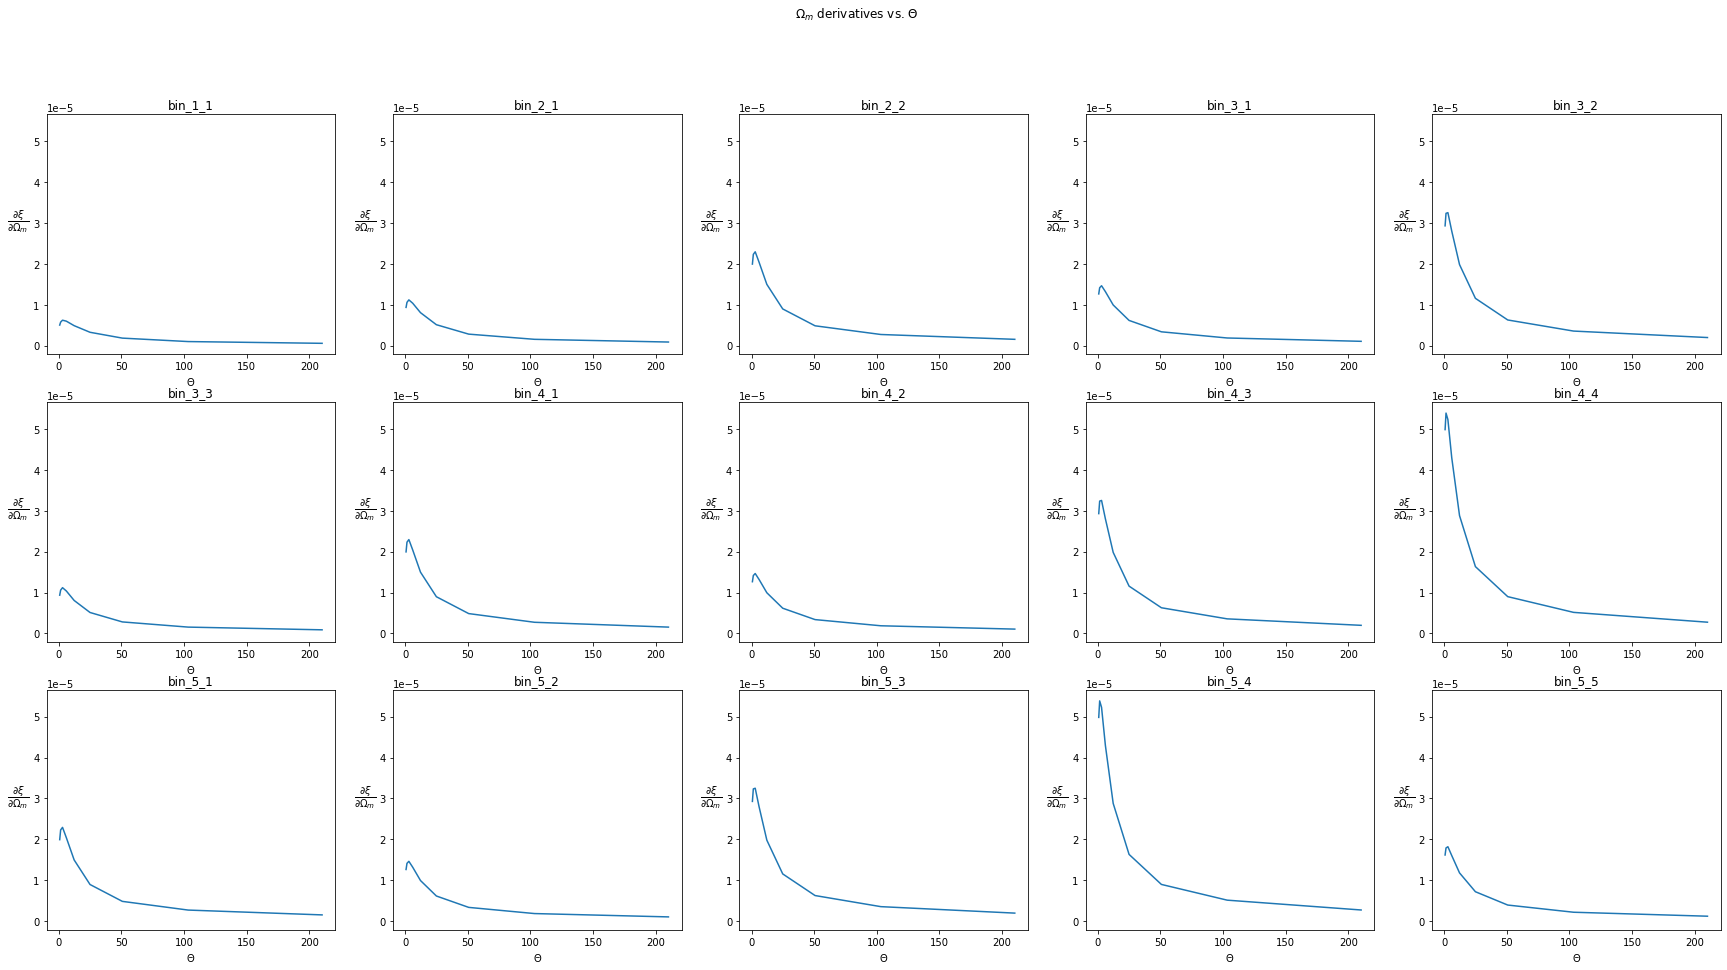

In [10]:
fig1, ax1 = plt.subplots(3, 5, sharey=True, sharex=True, figsize=(30,15))
fig1.suptitle("$\Omega_m$ derivatives vs. $\Theta$")
for i in range(3):
    ax1[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9:i*9+9])
    ax1[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+9:i*9+18])
    ax1[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+18:i*9+27])
    ax1[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+27:i*9+36])
    ax1[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+36:i*9+45])

for i, ax in enumerate(ax1.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\dfrac{\partial \xi}{\partial \Omega_m}$', rotation = 0, labelpad = 15)


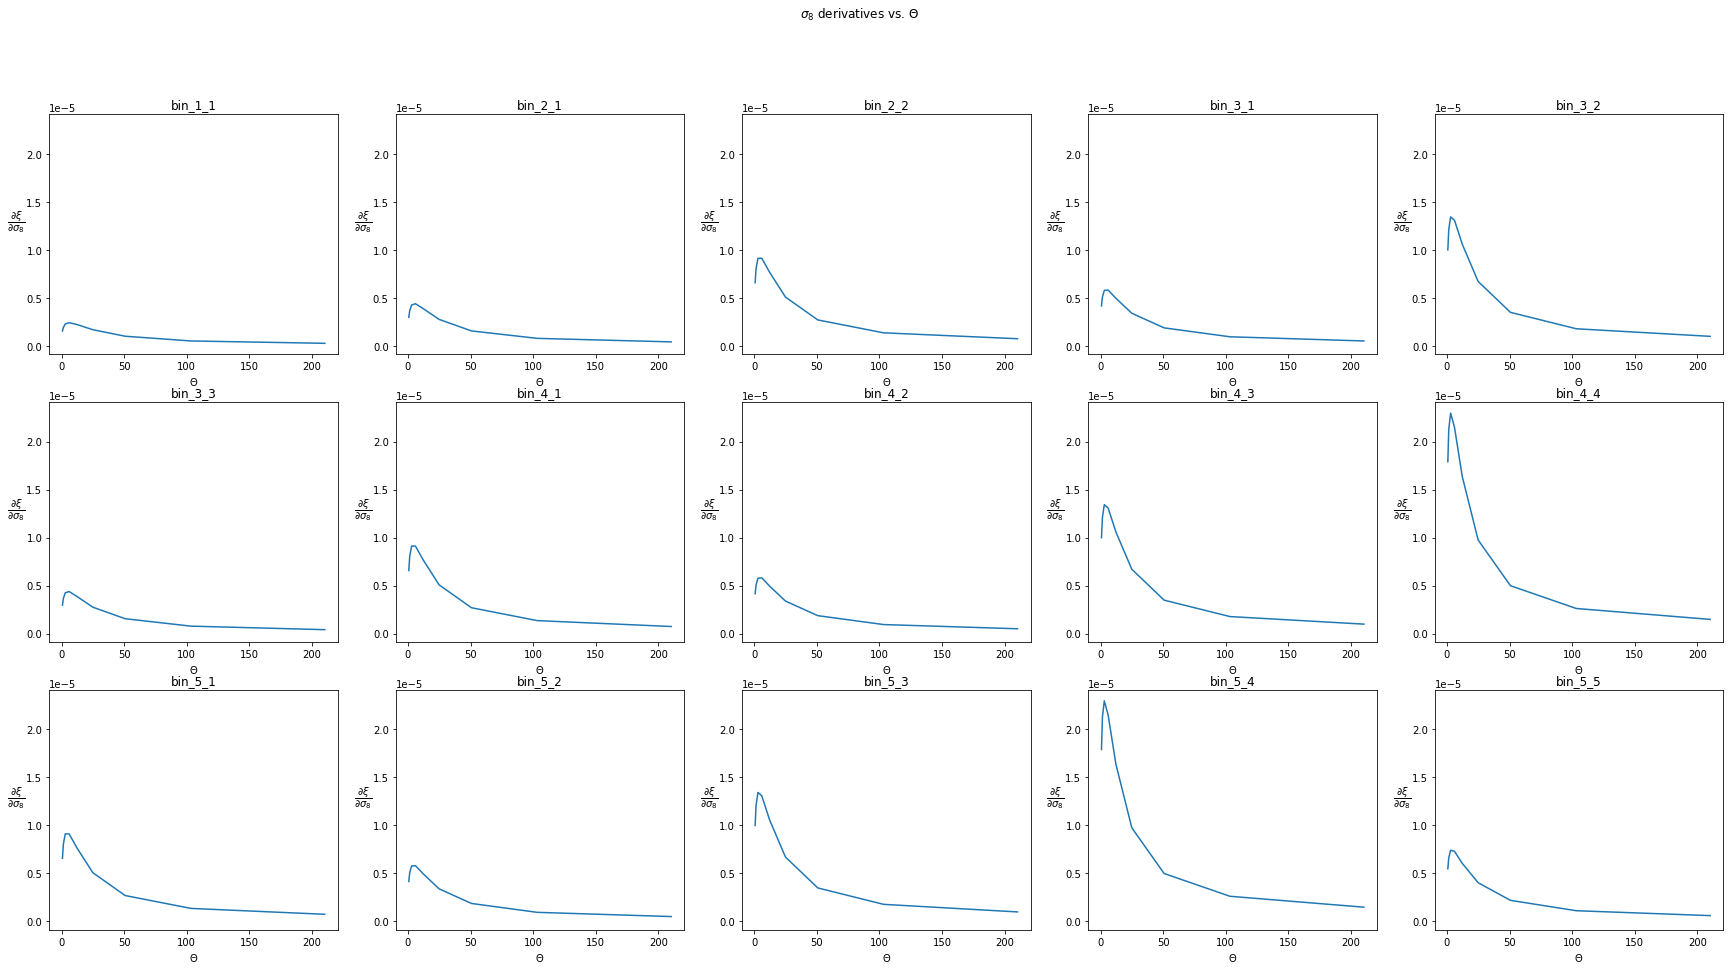

In [11]:
fig2, ax2 = plt.subplots(3, 5, sharex='all', sharey='all', figsize=(30,15))
fig2.suptitle("$\sigma_8$ derivatives vs. $\Theta$")
for i in range(3):
    ax2[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9:i*9+9])
    ax2[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+9:i*9+18])
    ax2[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+18:i*9+27])
    ax2[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+27:i*9+36])
    ax2[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+36:i*9+45])

for i, ax in enumerate(ax2.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\dfrac{\partial \xi}{\partial \sigma_8}$', rotation = 0, labelpad = 10)

Going to manually do a 5 pt stencil on a particular run to see if I get the right numerical value... Checks out

stepsize = 0.001188

-2dx = 1.102062485331285860e-07
-1dx = 1.124031138053878084e-07
+1dx = 1.168742971628652289e-07
+2dx = 1.191538072909414418e-07

deriv = 1.881446976852305560e-06

# Let's try out looking at what the actual correlation function looks like

In [12]:
shear_xi_dict = km.get_values(mock_run = 27, vals_to_read = ['shear_xi_plus_binned', 'shear_xi_minus_binned'], mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")

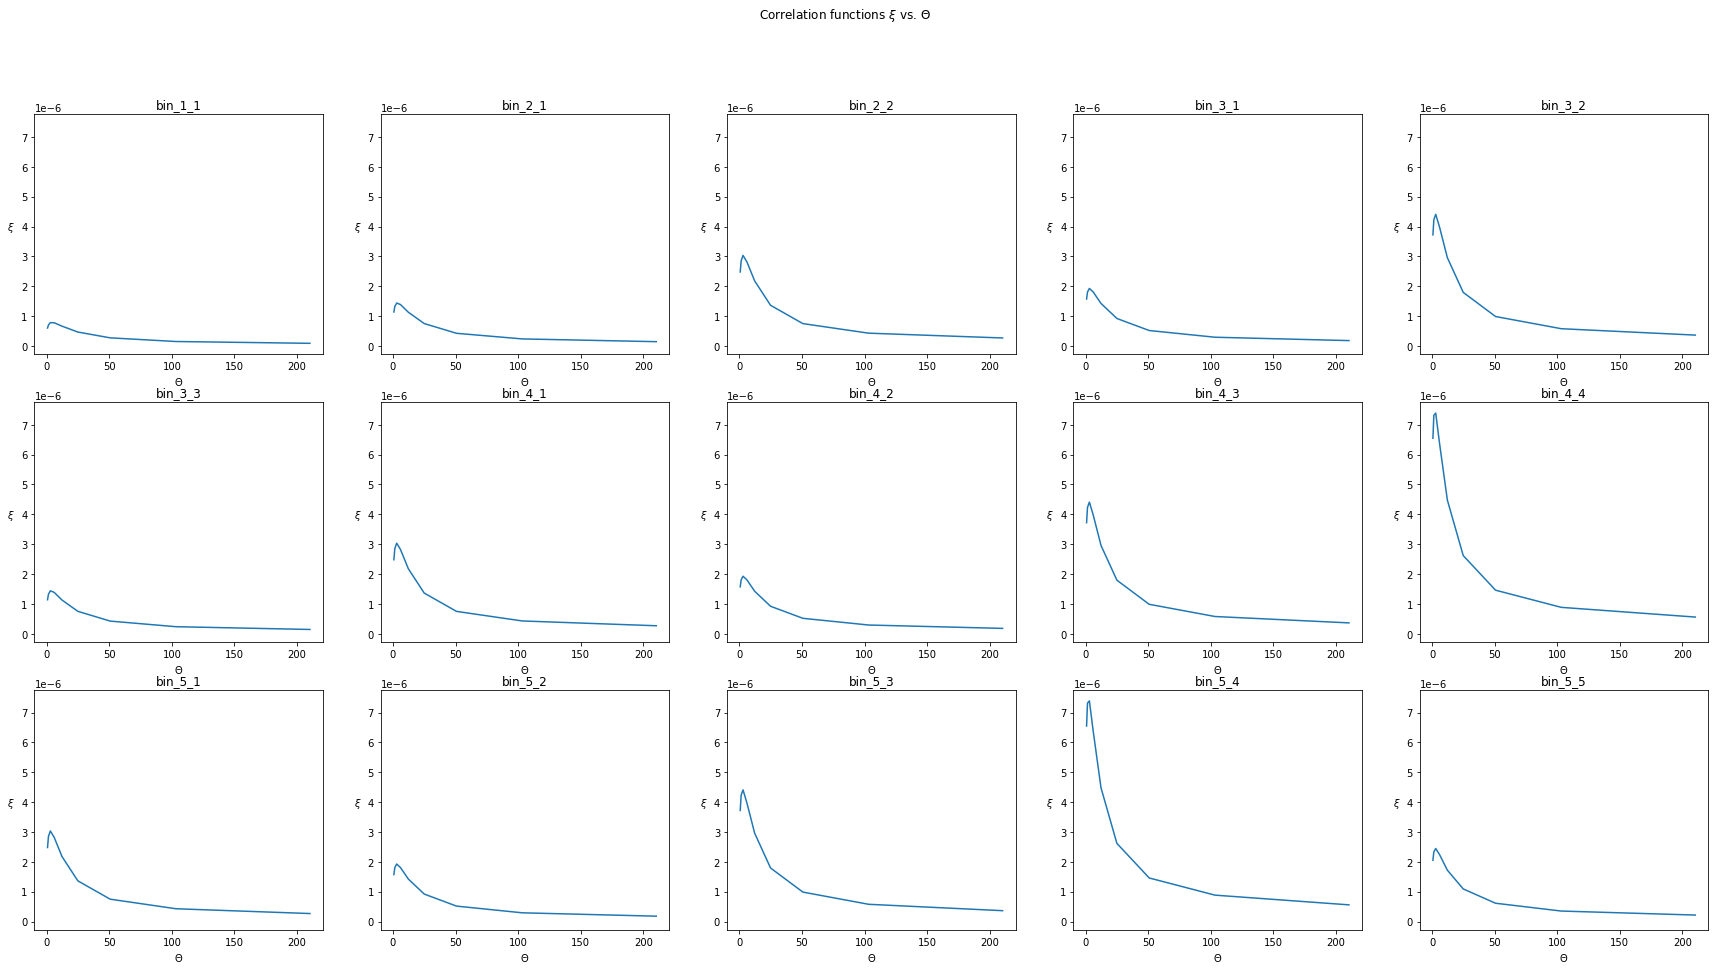

In [13]:
fig4, ax4 = plt.subplots(3, 5, sharex='all', sharey='all', figsize=(30,15))
fig4.suptitle("Correlation functions $\\xi$ vs. $\Theta$")
for i in range(3):
    ax4[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], shear_xi_dict['shear_xi_minus_binned'][i*9:i*9+9])
    ax4[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], shear_xi_dict['shear_xi_minus_binned'][i*9+9:i*9+18])
    ax4[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], shear_xi_dict['shear_xi_minus_binned'][i*9+18:i*9+27])
    ax4[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], shear_xi_dict['shear_xi_minus_binned'][i*9+27:i*9+36])
    ax4[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], shear_xi_dict['shear_xi_minus_binned'][i*9+36:i*9+45])

for i, ax in enumerate(ax4.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\xi$', rotation = 0, labelpad = 10)

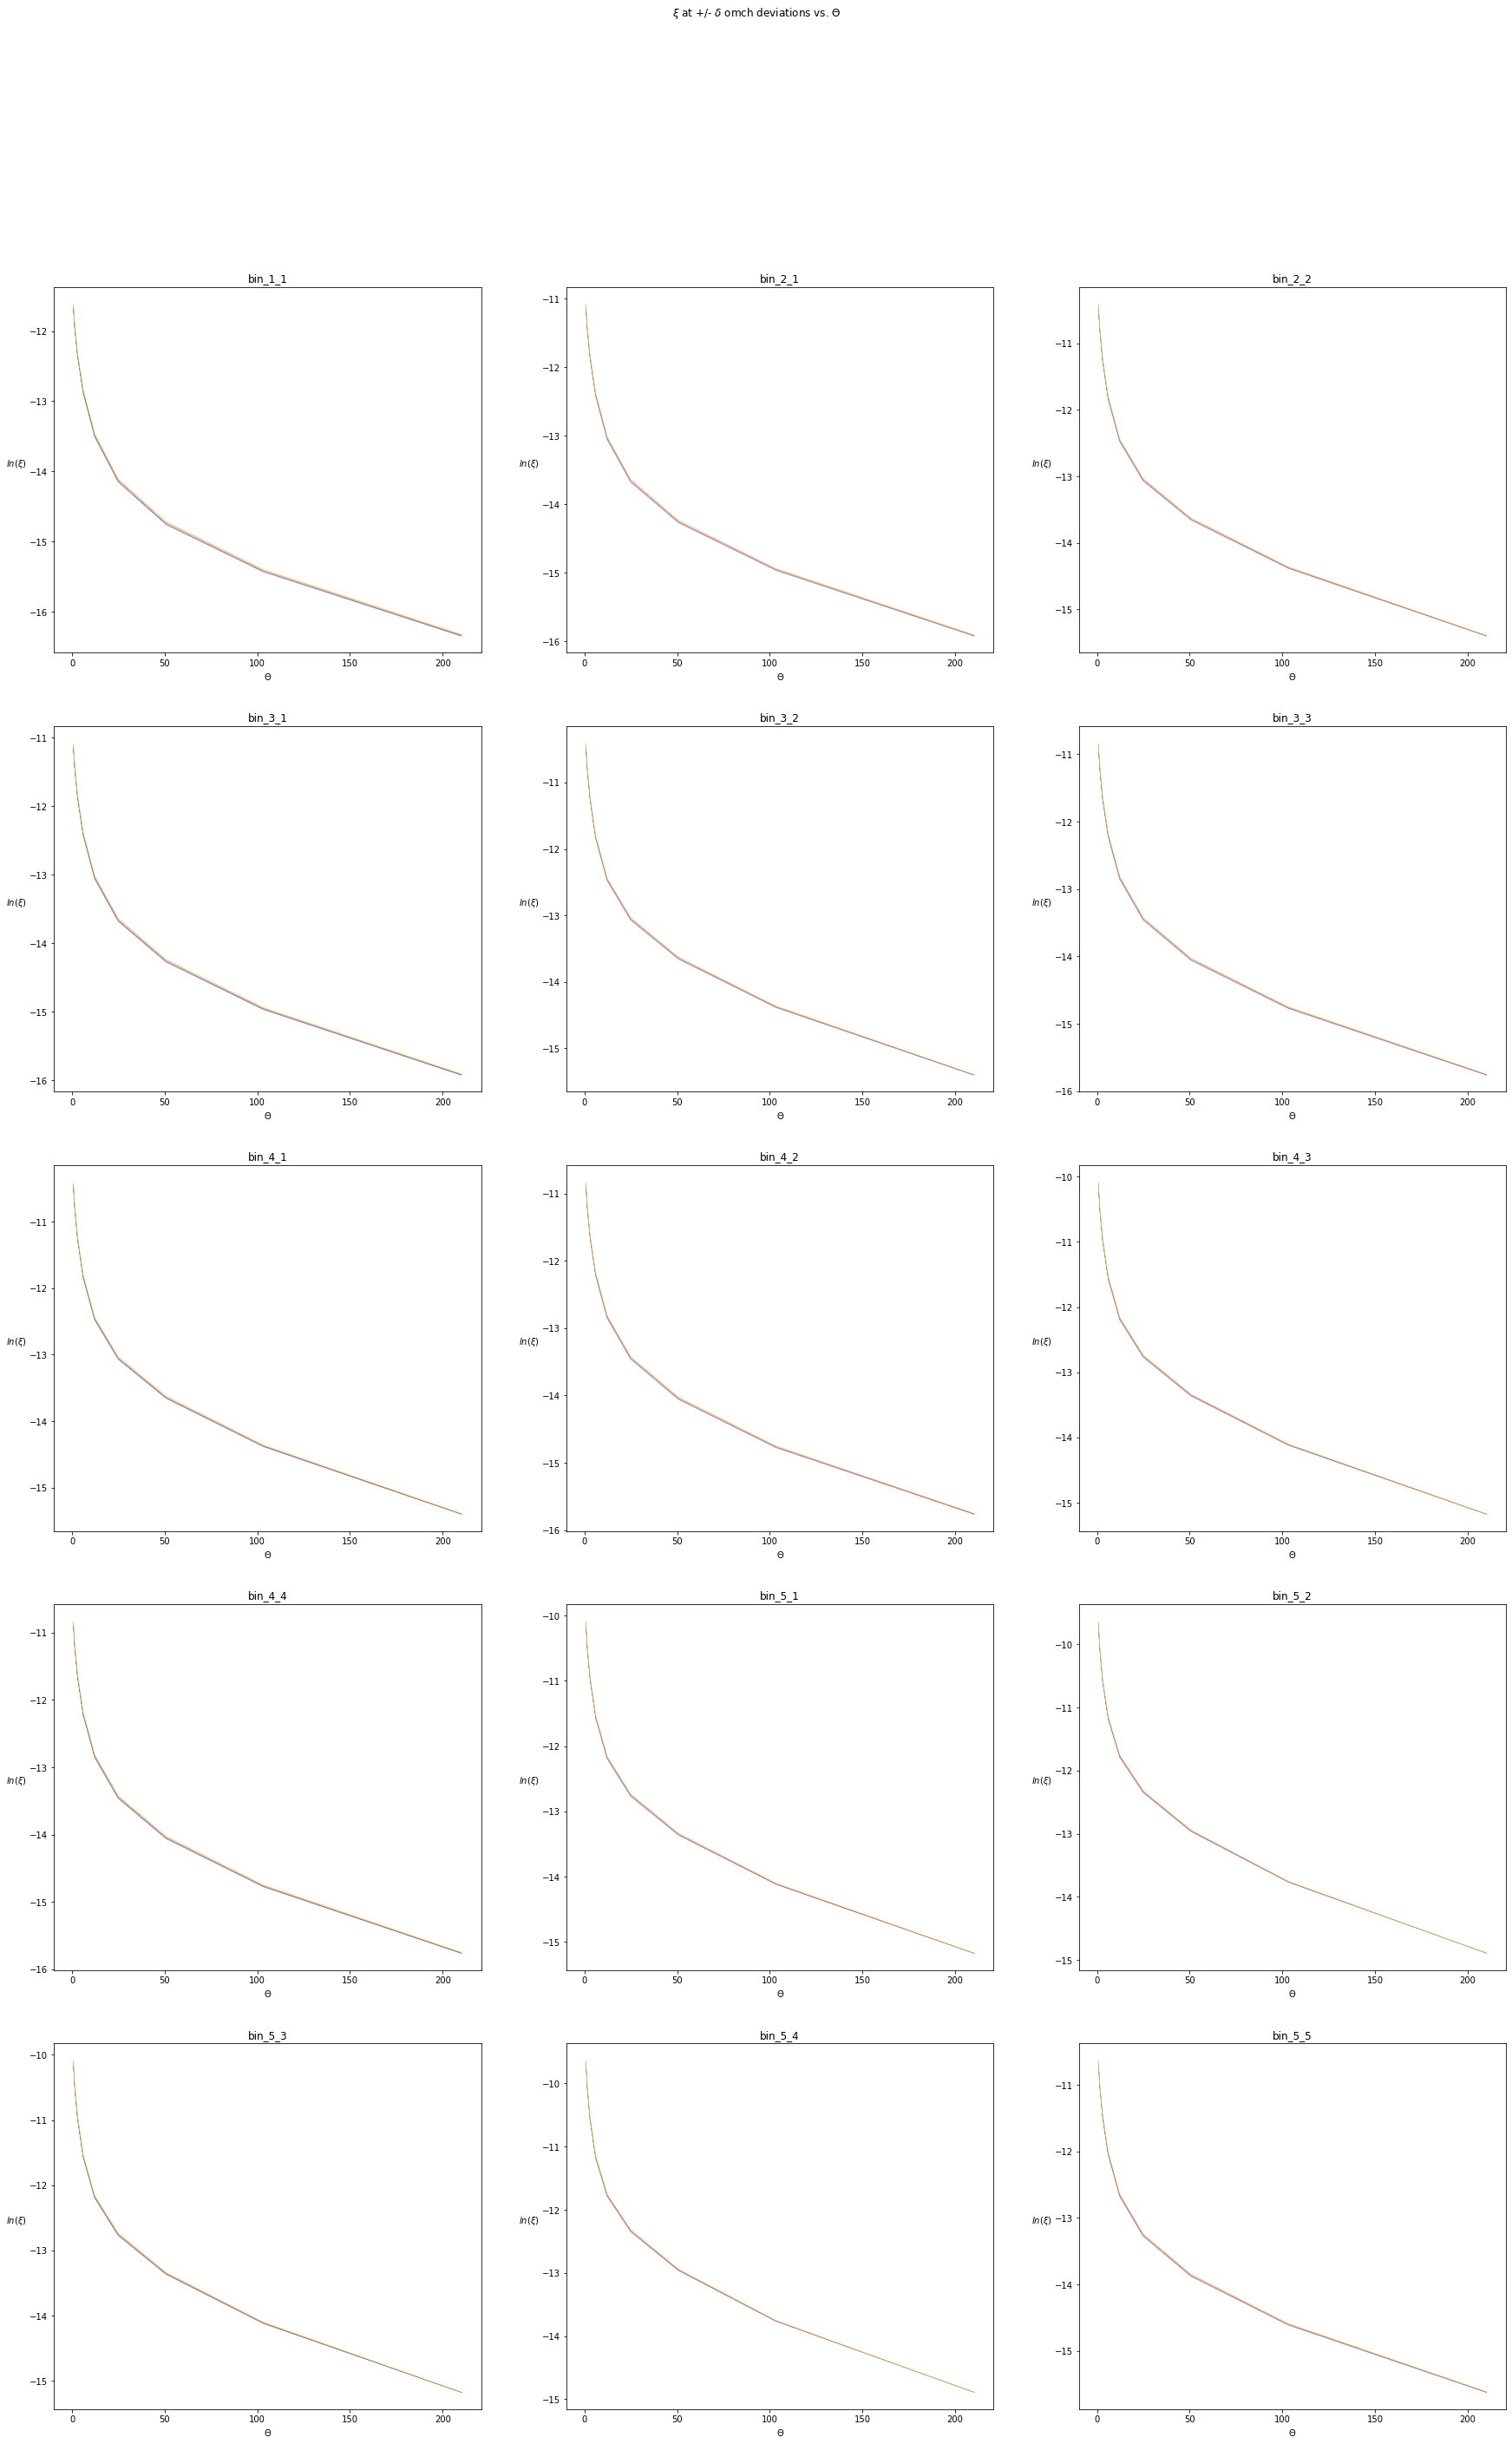

In [14]:
omega_m_dx_dict = km.get_values(mock_run = 27, vals_to_read = ['shear_xi_plus_binned_omch2-2dx', 'shear_xi_plus_binned_omch2-1dx', 'shear_xi_plus_binned', 'shear_xi_plus_binned_omch2+1dx', 'shear_xi_plus_binned_omch2+2dx'], 
                                mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")

fig5, ax5 = plt.subplots(5, 3, sharex=True, figsize=(30,45))
fig5.suptitle(r"$\xi$ at +/- $\delta$ omch deviations vs. $\Theta$")
for i in range(5):
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-2dx'][i*9:i*9+9]), color = '#042333', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-1dx'][i*9:i*9+9]), color = '#6b4596', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned'][i*9:i*9+9]), color = '#de7065', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+1dx'][i*9:i*9+9]), color = '#eb8055', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+2dx'][i*9:i*9+9]), color = '#e8fa5b', linewidth=0.4)

    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-2dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-1dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned'][i*9+9:i*9+18]), color = '#de7065', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+1dx'][i*9+9:i*9+18]), color = '#eb8055', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+2dx'][i*9+9:i*9+18]), color = '#e8fa5b', linewidth=0.4)

    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-2dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-1dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned'][i*9+18:i*9+27]), color = '#de7065', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+1dx'][i*9+18:i*9+27]), color = '#eb8055', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+2dx'][i*9+18:i*9+27]), color = '#e8fa5b', linewidth=0.4)

for i, ax in enumerate(ax5.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$ln(\xi)$', rotation = 0, labelpad = 15)

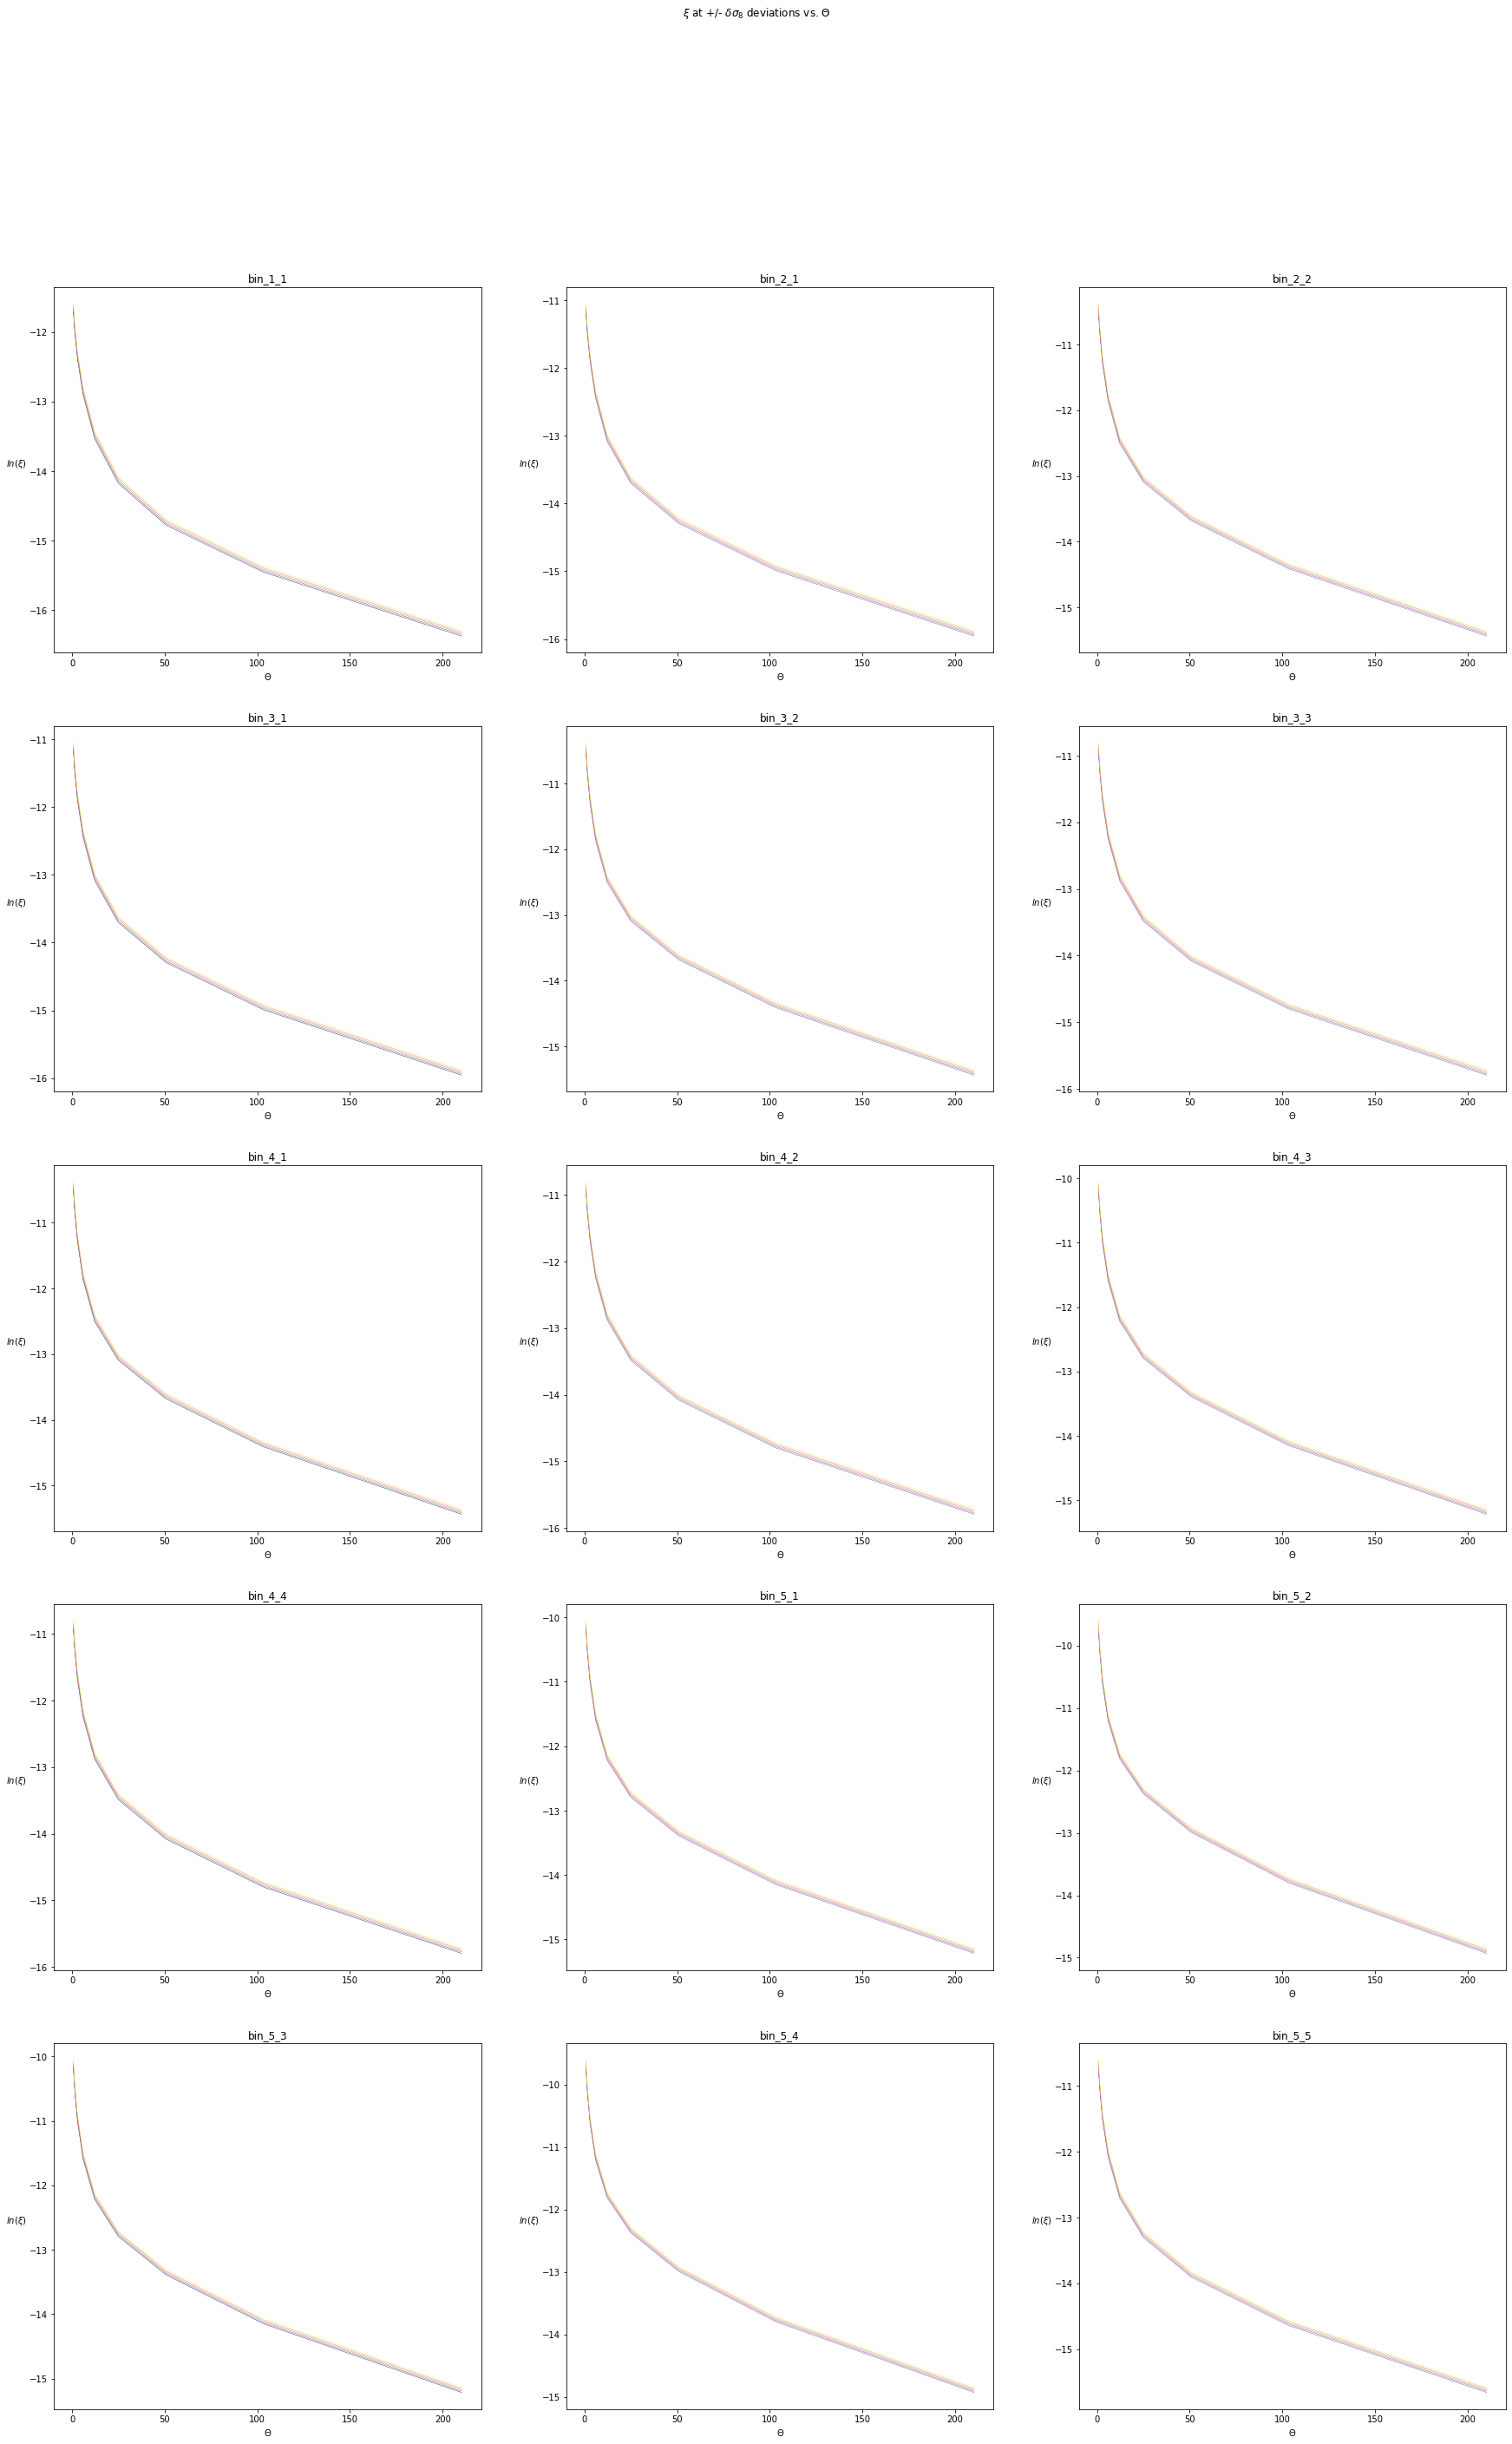

In [15]:
sigma_8_dx_dict = km.get_values(mock_run = 27, vals_to_read = ['shear_xi_plus_binned_sigma_8-2dx', 'shear_xi_plus_binned_sigma_8-1dx', 'shear_xi_plus_binned', 'shear_xi_plus_binned_sigma_8+1dx', 'shear_xi_plus_binned_sigma_8+2dx'],
                                mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")


fig5, ax5 = plt.subplots(5, 3, sharex=True, figsize=(30,45))
fig5.suptitle(r"$\xi$ at +/- $\delta \sigma_8$ deviations vs. $\Theta$")
for i in range(5):
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8-2dx'][i*9:i*9+9]), color = '#042333', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8-1dx'][i*9:i*9+9]), color = '#6b4596', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict['shear_xi_plus_binned'][i*9:i*9+9]), color = '#de7065', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8+1dx'][i*9:i*9+9]), color = '#eb8055', linewidth=0.4)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8+2dx'][i*9:i*9+9]), color = '#e8fa5b', linewidth=0.4)

    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8-2dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8-1dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict['shear_xi_plus_binned'][i*9+9:i*9+18]), color = '#de7065', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8+1dx'][i*9+9:i*9+18]), color = '#eb8055', linewidth=0.4)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8+2dx'][i*9+9:i*9+18]), color = '#e8fa5b', linewidth=0.4)

    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8-2dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8-1dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict['shear_xi_plus_binned'][i*9+18:i*9+27]), color = '#de7065', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8+1dx'][i*9+18:i*9+27]), color = '#eb8055', linewidth=0.4)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict['shear_xi_plus_binned_sigma_8+2dx'][i*9+18:i*9+27]), color = '#e8fa5b', linewidth=0.4)

for i, ax in enumerate(ax5.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$ln(\xi)$', rotation = 0, labelpad = 15)

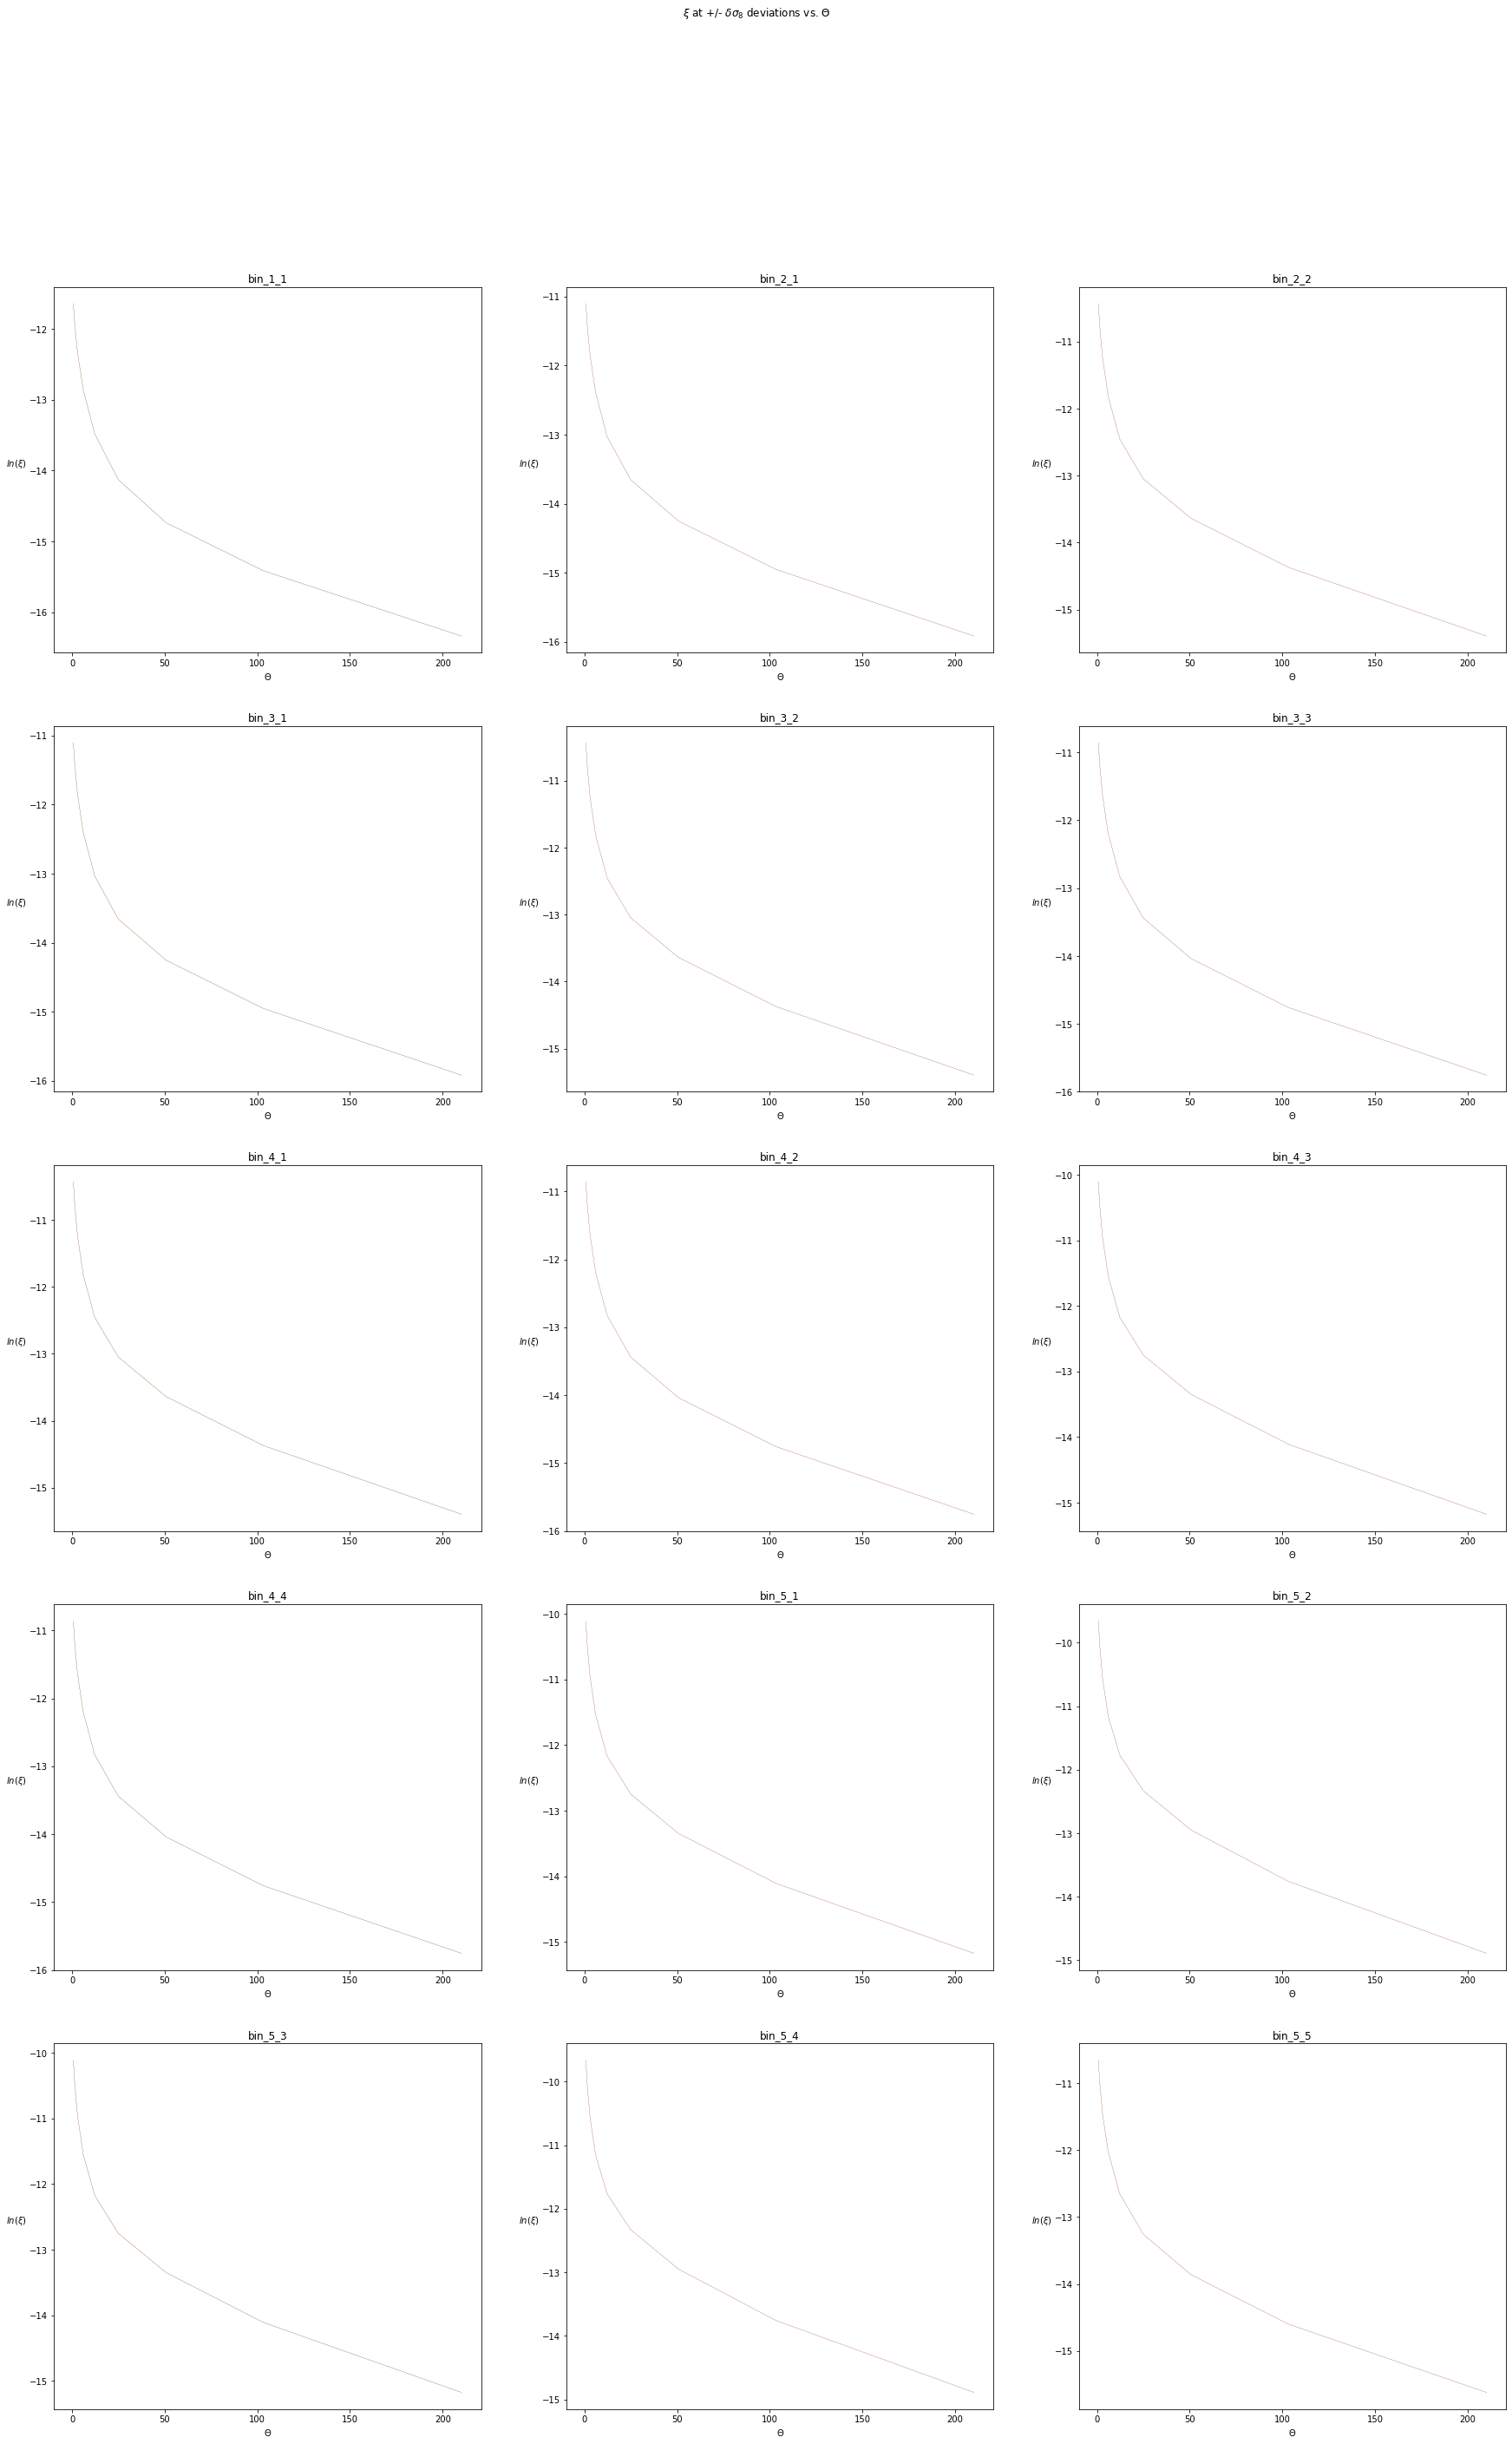

In [16]:
sigma_8_dx_dict_2 = km.get_values(mock_run = 8, vals_to_read = ['shear_xi_plus_binned_sigma_8-2dx', 'shear_xi_plus_binned_sigma_8-1dx', 'shear_xi_plus_binned', 'shear_xi_plus_binned_sigma_8+1dx', 'shear_xi_plus_binned_sigma_8+2dx'],
                                mocks_dir = "/home/ruyi_wsl/kcap_output/kids_stepsize", mocks_name = "kids_stepsize")


fig6, ax6 = plt.subplots(5, 3, sharex=True, figsize=(30,45))
fig6.suptitle(r"$\xi$ at +/- $\delta \sigma_8$ deviations vs. $\Theta$")
for i in range(5):
    ax6[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8-2dx'][i*9:i*9+9]), color = '#042333', linewidth=0.1)
    ax6[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8-1dx'][i*9:i*9+9]), color = '#6b4596', linewidth=0.1)
    ax6[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned'][i*9:i*9+9]), color = '#de7065', linewidth=0.1)
    ax6[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8+1dx'][i*9:i*9+9]), color = '#eb8055', linewidth=0.1)
    ax6[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8+2dx'][i*9:i*9+9]), color = '#e8fa5b', linewidth=0.1)

    ax6[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8-2dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.1)
    ax6[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8-1dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.1)
    ax6[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned'][i*9+9:i*9+18]), color = '#de7065', linewidth=0.1)
    ax6[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8+1dx'][i*9+9:i*9+18]), color = '#eb8055', linewidth=0.1)
    ax6[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8+2dx'][i*9+9:i*9+18]), color = '#e8fa5b', linewidth=0.1)

    ax6[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8-2dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.1)
    ax6[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8-1dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.1)
    ax6[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned'][i*9+18:i*9+27]), color = '#de7065', linewidth=0.1)
    ax6[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8+1dx'][i*9+18:i*9+27]), color = '#eb8055', linewidth=0.1)
    ax6[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(sigma_8_dx_dict_2['shear_xi_plus_binned_sigma_8+2dx'][i*9+18:i*9+27]), color = '#e8fa5b', linewidth=0.1)

for i, ax in enumerate(ax6.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$ln(\xi)$', rotation = 0, labelpad = 15)